<a href="https://colab.research.google.com/github/Zakharov1977/MIPT_ML/blob/main/HW_Analitic3_Zakharov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import glob
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/JeffSackmann/tennis_atp

Cloning into 'tennis_atp'...
remote: Enumerating objects: 3358, done.
remote: Total 3358 (delta 0), reused 0 (delta 0), pack-reused 3358
Receiving objects: 100% (3358/3358), 280.31 MiB | 24.00 MiB/s, done.
Resolving deltas: 100% (2622/2622), done.
Checking out files: 100% (174/174), done.


In [3]:
glob.glob('tennis_atp/atp_matches_[12][019][01298]*')

['tennis_atp/atp_matches_1980.csv',
 'tennis_atp/atp_matches_1986.csv',
 'tennis_atp/atp_matches_2011.csv',
 'tennis_atp/atp_matches_1984.csv',
 'tennis_atp/atp_matches_2003.csv',
 'tennis_atp/atp_matches_2016.csv',
 'tennis_atp/atp_matches_2020.csv',
 'tennis_atp/atp_matches_2006.csv',
 'tennis_atp/atp_matches_2018.csv',
 'tennis_atp/atp_matches_1982.csv',
 'tennis_atp/atp_matches_2010.csv',
 'tennis_atp/atp_matches_1998.csv',
 'tennis_atp/atp_matches_2002.csv',
 'tennis_atp/atp_matches_1997.csv',
 'tennis_atp/atp_matches_2012.csv',
 'tennis_atp/atp_matches_2021.csv',
 'tennis_atp/atp_matches_2001.csv',
 'tennis_atp/atp_matches_2004.csv',
 'tennis_atp/atp_matches_2013.csv',
 'tennis_atp/atp_matches_2005.csv',
 'tennis_atp/atp_matches_1995.csv',
 'tennis_atp/atp_matches_1996.csv',
 'tennis_atp/atp_matches_2019.csv',
 'tennis_atp/atp_matches_1981.csv',
 'tennis_atp/atp_matches_2017.csv',
 'tennis_atp/atp_matches_1987.csv',
 'tennis_atp/atp_matches_1990.csv',
 'tennis_atp/atp_matches_201

In [5]:
df = pd.concat([pd.read_csv(i)
                for i in glob.glob('tennis_atp/atp_matches_[12][019][01298]*')],
                axis=0)

In [9]:
df.columns


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [10]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,1,100437,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,6.0,NaN
1,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,2,100342,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,NaN
2,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,3,100437,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,NaN
3,1980-205,Lagos,Clay,32,A,19800225,1,100259,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN
4,1980-205,Lagos,Clay,32,A,19800225,2,100135,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ЗАДАЧИ:
Ваша задача — проверить, как изменился мир тенниса за последнее время. Для анализа используйте этот датасет. Применяйте только данные из одиночного разряда (файлы в формате «atp_matches_YYYY.csv»). Желательно сопровождать выбранный статистический тест ссылкой на его документацию и указывать нулевую гипотезу, которую этот тест проверяет. Далеко не всегда это очевидно.

1. Вы хотите узнать, как много значит ранг игрока в теннисе. Проверьте следующие утверждения:

а) Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе);

In [83]:
# change data format
df.tourney_date.apply(lambda x: '%.0f' % round(x, 0))
df.loc[:, 'tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')
df['tourney_date']

TypeError: ignored

In [84]:

df_rank = df.copy()

# Delete missings value.

df_rank = df_rank.dropna(subset=['winner_rank', 'loser_rank'])
df_rank = df_rank.reset_index(drop=True)
df_rank.shape

# 20 rang posishion.

df_rank['higher_rank_win'] = (df_rank['winner_rank']
                                - df_rank['loser_rank']) > 20
df_rank['higher_rank_win']

# simillar rank

df_rank['similar_rank'] = abs(df_rank['winner_rank']
                                - df_rank['loser_rank']) <= 5
df_rank['similar_rank']

0          True
1          True
2          True
3         False
4         False
          ...  
128499    False
128500    False
128501    False
128502    False
128503     True
Name: similar_rank, Length: 128504, dtype: bool

In [87]:

df_win = df_rank[['winner_name', 'higher_rank_win', 'similar_rank']]\
                       .groupby('winner_name')\
                       .agg({'higher_rank_win':['count', 'sum'],
                             'similar_rank': 'sum'})

df_win.columns = df_win.columns.droplevel(0)
df_win = df_win.reset_index()

df_win.columns = ['name', 'win_count', 'count_win_high_rank', 'count_win_sim_rank']
df_win.head()

,name,win_count,count_win_high_rank,count_win_sim_rank
0,Aaron Krickstein,380,33,20
1,Abdelhak Hameurlaine,2,1,1
2,Abdullah Maqdas,7,4,0
3,Adam Chadaj,2,1,0
4,Adam Kellner,4,0,0


In [88]:
# Losers.

df_lose = df_rank[['loser_name', 'higher_rank_win', 'similar_rank']]\
                         .groupby('loser_name')\
                         .agg({'higher_rank_win':['count','sum'],
                               'similar_rank': 'sum'})

df_lose.columns = df_lose.columns.droplevel(0)
df_lose = df_lose.reset_index()

df_lose.columns = ['name', 'lose_count', 'count_lose_high_rank', 'count_lose_sim_rank']
df_lose.head()

,name,lose_count,count_lose_high_rank,count_lose_sim_rank
0,Aaron Krickstein,252,105,17
1,Abdelhak Hameurlaine,4,0,0
2,Abdul Kahar Mim,2,0,0
3,Abdul Khalek Nadini,2,1,0
4,Abdul Mumin Babalola,2,0,0


In [89]:
# in common df (losers and winners).

df_final = df_win.merge(df_lose, on='name', how='inner')

df_final.head()

,name,win_count,count_win_high_rank,count_win_sim_rank,lose_count,count_lose_high_rank,count_lose_sim_rank
0,Aaron Krickstein,380,33,20,252,105,17
1,Abdelhak Hameurlaine,2,1,1,4,0,0
2,Abdullah Maqdas,7,4,0,8,1,0
3,Adam Chadaj,2,1,0,1,0,0
4,Adam Kellner,4,0,0,7,3,0


In [90]:
# Calculate the sum of matches and the percentage
# of matches won and lost with a high rank and in common group.

df_final['sum_matches'] = (df_final['win_count']
                                + df_final['lose_count'])

df_final['prob_win_high_rank'] = (df_final['count_win_high_rank']
                                       /(df_final['count_win_high_rank']
                                       + df_final['count_lose_high_rank']))

df_final['prob_win_common'] = (df_final['win_count']
                                    /df_final['sum_matches'])

df_final.head()

,name,win_count,count_win_high_rank,count_win_sim_rank,lose_count,count_lose_high_rank,count_lose_sim_rank,sum_matches,prob_win_high_rank,prob_win_common
0,Aaron Krickstein,380,33,20,252,105,17,632,0.23913,0.601266
1,Abdelhak Hameurlaine,2,1,1,4,0,0,6,1.00000,0.333333
2,Abdullah Maqdas,7,4,0,8,1,0,15,0.80000,0.466667
3,Adam Chadaj,2,1,0,1,0,0,3,1.00000,0.666667
4,Adam Kellner,4,0,0,7,3,0,11,0.00000,0.363636


In [18]:
''' documentation stat metods
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html
'''
stats.wilcoxon(df_rank_final['prob_win_high_rank'],
               df_rank_final['prob_win_common'], alternative = 'greater')

WilcoxonResult(statistic=2112723.5, pvalue=1.2299983424366095e-132)

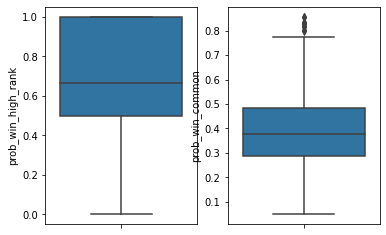

In [19]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df_rank_final, y='prob_win_high_rank', ax=axes[0])
sns.boxplot(data=df_rank_final, y='prob_win_common', ax=axes[1])

б) Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

In [92]:
# Similar rank.

df_final['prob_win_sim_rank'] = (df_final['count_win_sim_rank']
                                       /(df_final['count_win_sim_rank']
                                       + df_final['count_lose_sim_rank']))
# Wilcoxon test.

stats.wilcoxon(df_final['prob_win_sim_rank'],
               df_final['prob_win_common'], alternative = 'greater')

WilcoxonResult(statistic=333378.0, pvalue=1.0)

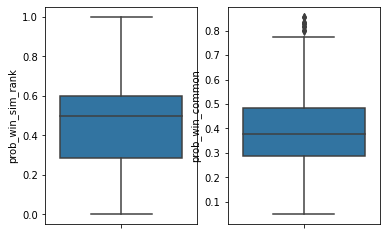

In [93]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df_final, y='prob_win_sim_rank', ax=axes[0])
sns.boxplot(data=df_final, y='prob_win_common', ax=axes[1])

2. Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг. Как изменилось среднее количество сетов, которое победитель затратил на игру? Является ли разница средних этих двух выборок статистически значимой? Выбор статистического теста обоснуйте.

In [94]:
df1 = df.loc[df['score'].map(lambda x: type(x) is str)].copy()
df1.shape

(142220, 49)

In [95]:
df1['sets_num'] = df1['score'].map(lambda x: len(x.split()))

In [96]:
df1_early = df1[(df1['tourney_date'].dt.year>1979) & (df1['tourney_date']\
                                                           .dt.year<2002)]
df1_last = df1[(df1['tourney_date'].dt.year>2001) & (df1['tourney_date']\
                                                          .dt.year<2023)]

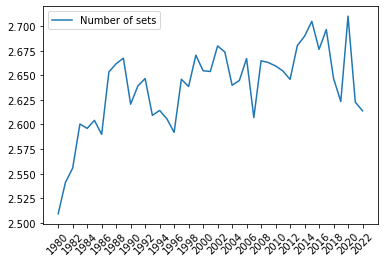

In [97]:
years = []
for i in range(1980, 2023):
    years.append(i)

num_sets_win = df1.groupby(df1.tourney_date.dt.year).sets_num.mean()


plt.xticks(np.arange(1980, 2023, 2), rotation=45)
plt.plot(years, num_sets_win.loc[1980:2022], label='Number of sets')
plt.legend()

In [43]:
# Form dateframes with an average number of sets by years.

early_sets_num = df1_early_year[['sets_num']]\
                .groupby(df1_early_year.tourney_date.dt.year).mean().reset_index()

last_sets_num = df1_last_year[['sets_num']]\
                .groupby(df1_last_year.tourney_date.dt.year).mean().reset_index()

In [98]:
s, p = shapiro(early_sets_num['sets_num'])
print('p=%.3f' % p)

s, p = shapiro(last_sets_num['sets_num'])
print('p=%.3f' % p)

p=0.074
p=0.883


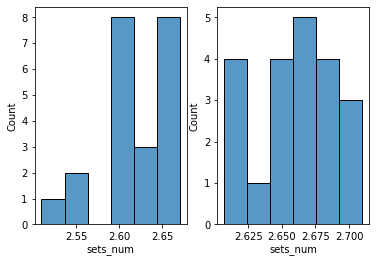

In [99]:
fig, axes = plt.subplots(1, 2)
sns.histplot(early_sets_num['sets_num'], ax=axes[0]);
sns.histplot(last_sets_num['sets_num'], ax=axes[1]);

In [100]:
'''
Description used stat test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

'''

stats.mannwhitneyu(early_sets_num['sets_num'],
                   last_sets_num['sets_num'], alternative='greater')

MannwhitneyuResult(statistic=88.0, pvalue=0.9997553479076992)

3. У вас появились сомнения — не является ли результат, который вы посчитали на предыдущем шаге, некорректным. Кажется, что на это мог повлиять формат самого матча — best of 3 или best of 5. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

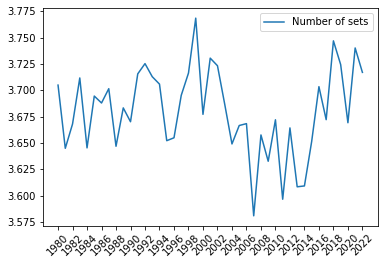

In [102]:
df1_early_5 = df1_early[df1_early['best_of']==5]
early_sets_5 = df1_early_5[['sets_num']]\
                .groupby(df1_early_5.tourney_date.dt.year).mean().reset_index()

df1_last_5 = df1_last[df1_last['best_of']==5]
last_sets_5 = df1_last_5[['sets_num']]\
                .groupby(df1_last_5.tourney_date.dt.year).mean().reset_index()

df1_best_5 = df1[df1['best_of']==5]

df1_best_5 = df1_best_5.reset_index()

num_sets_win = df1_best_5.groupby(df1_best_5.tourney_date.dt.year).sets_num.mean()


plt.xticks(np.arange(1980, 2023, 2), rotation=45)
plt.plot(years, num_sets_win.loc[1980:2022], label='Number of sets')
plt.legend()

In [103]:
# Seeing normality

s, p = shapiro(early_sets_5['sets_num'])
print('p=%.3f' % p)

s, p = shapiro(last_sets_5['sets_num'])
print('p=%.3f' % p)

p=0.390
p=0.597


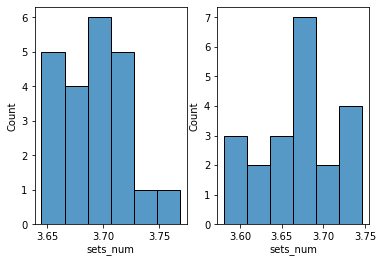

In [104]:
'''
Used stat test Shapiro-Wilk test
'''

fig, axes = plt.subplots(1, 2)
sns.histplot(early_sets_5['sets_num'], ax=axes[0]);
sns.histplot(last_sets_5['sets_num'], ax=axes[1]);

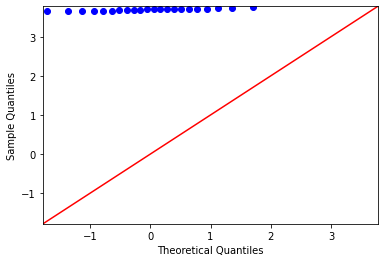

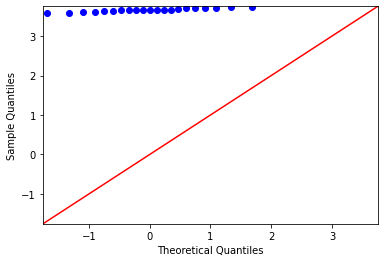

In [105]:
# QQ-plot, by normally.

fig = sm.qqplot(early_sets_5['sets_num'], line='45')
plt.show()
fig = sm.qqplot(last_sets_5['sets_num'], line='45')
plt.show()

In [106]:
'''
Used stat test Mann-Whitney test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

'''

stats.mannwhitneyu(early_sets_5['sets_num'],
                   last_sets_5['sets_num'], alternative='greater')

MannwhitneyuResult(statistic=294.0, pvalue=0.06444044855466616)

In [107]:
stats.mannwhitneyu(early_sets_5['sets_num'],
                   last_sets_5['sets_num'],
                   alternative='less')

MannwhitneyuResult(statistic=294.0, pvalue=0.9385635319255627)

4. Вы хотите изучить психологическую устойчивость профессиональных игроков в теннис. Одним из важных показателей такой устойчивости будет доля выигранных брейк-поинтов. Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков), для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд). Постройте box-plot’ы для этих статистик для каждого из игроков. Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков? Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками? Выбор статистического теста обоснуйте.

In [108]:
df1['win_m_bp'] = (df1['w_bpSaved'] / (df1['w_bpFaced'] + df1['w_bpSaved']))
df1['los_m_bp'] = (df1['l_bpSaved'] / (df1['l_bpFaced'] + df1['l_bpSaved']))

# Roger Federer

df_federer_win = df1[df1['winner_name'] == 'Roger Federer']
bp_federer_win = df_federer_win['win_m_bp'].groupby(df_federer_win.tourney_date.dt.year)\
                                           .mean().reset_index()

df_federer_los = df1[df1['loser_name'] == 'Roger Federer']
bp_federer_los = df_federer_los['los_m_bp'].groupby(df_federer_los.tourney_date.dt.year)\
                                           .mean().reset_index()

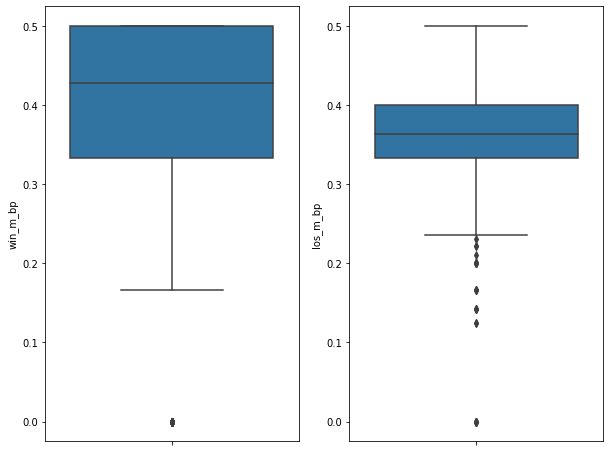

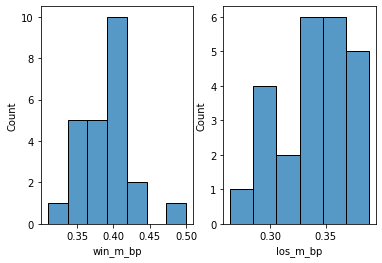

In [110]:
# Visualization matchs R.Federer.

fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data = df_federer_win, y='win_m_bp', ax=axs[0])
sns.boxplot(data=df_federer_los, y='los_m_bp', ax=axs[1])


fig, axes = plt.subplots(1, 2)
sns.histplot(bp_federer_win['win_m_bp'], ax=axes[0]);
sns.histplot(bp_federer_los['los_m_bp'], ax=axes[1]);

In [111]:
# Jonas Bjorkman.

jonas_bjorkman_win = df1[df1['winner_name'] == 'Jonas Bjorkman']
bp_bjorkman_win = jonas_bjorkman_win['win_m_bp'].groupby(jonas_bjorkman_win.tourney_date.dt.year)\
                                                .mean().reset_index()

jonas_bjorkman_los = df1[df1['loser_name'] == 'Jonas Bjorkman']
bp_bjorkman_los = jonas_bjorkman_los['los_m_bp'].groupby(jonas_bjorkman_los.tourney_date.dt.year)\
                                                .mean().reset_index()

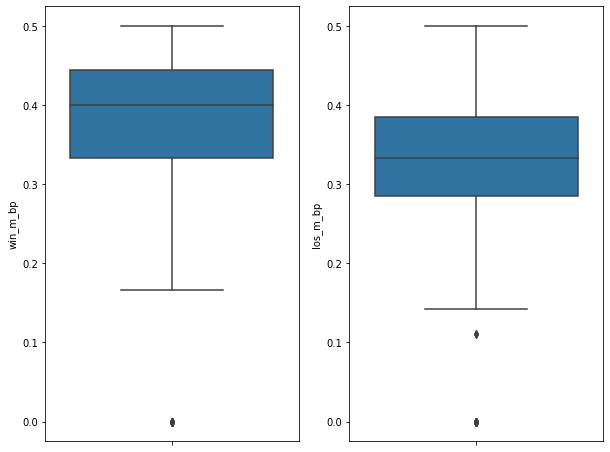

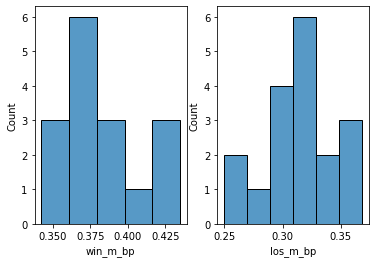

In [112]:
# Visealization games J.Bjorkman

fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=jonas_bjorkman_win, y='win_m_bp', ax=axs[0])
sns.boxplot(data=jonas_bjorkman_los, y='los_m_bp', ax=axs[1])
fig, axes = plt.subplots(1, 2)
sns.histplot(bp_bjorkman_win['win_m_bp'], ax=axes[0]);
sns.histplot(bp_bjorkman_los['los_m_bp'], ax=axes[1]);

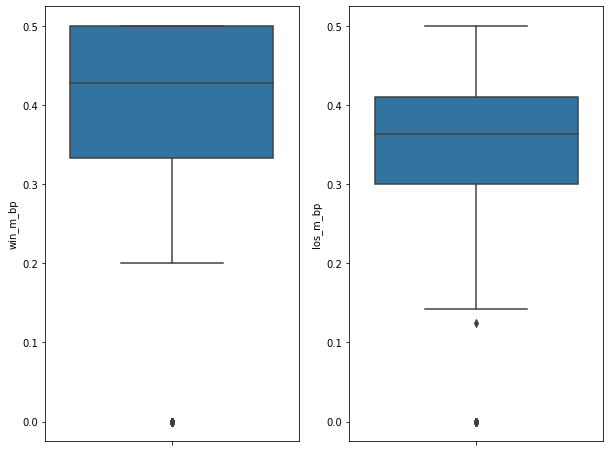

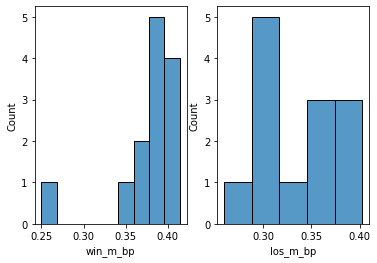

In [113]:
# Andy Roddick.

andy_roddick_win = df1[df1['winner_name'] == 'Andy Roddick']
bp_roddick_win = andy_roddick_win['win_m_bp'].groupby(andy_roddick_win.tourney_date.dt.year)\
                                             .mean().reset_index()

andy_roddick_los = df1[df1['loser_name'] == 'Andy Roddick']
bp_roddick_los = andy_roddick_los['los_m_bp'].groupby(andy_roddick_los.tourney_date.dt.year)\
                                             .mean().reset_index()
# Visualization A.Roddick

fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=andy_roddick_win, y='win_m_bp', ax=axs[0])
sns.boxplot(data=andy_roddick_los, y='los_m_bp', ax=axs[1])  

fig, axes = plt.subplots(1, 2)
sns.histplot(bp_roddick_win['win_m_bp'], ax=axes[0]);
sns.histplot(bp_roddick_los['los_m_bp'], ax=axes[1]);                                

In [114]:
# Dependens/independens between players.

df[(df['winner_name'] == 'Roger Federer') & (df['loser_name'] == 'Jonas Bjorkman')].shape[0]

5

In [115]:
df[(df['loser_name'] == 'Roger Federer') & (df['winner_name'] == 'Jonas Bjorkman')].shape[0]

0

In [116]:
df[(df['winner_name'] == 'Roger Federer') & (df['loser_name'] == 'Andy Roddick')].shape[0]

21

In [117]:
df[(df['loser_name'] == 'Roger Federer') & (df['winner_name'] == 'Andy Roddick')].shape[0]

3

In [118]:
df[(df['winner_name'] == 'Andy Roddick') & (df['loser_name'] == 'Jonas Bjorkman')].shape[0]

5

In [119]:
df[(df['loser_name'] == 'Andy Roddick') & (df['winner_name'] == 'Jonas Bjorkman')].shape[0]

2

In [120]:
'''
Used stat test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

'''

stats.kruskal(bp_federer_win['win_m_bp'],
              bp_bjorkman_win['win_m_bp'],
              bp_roddick_win['win_m_bp'],
              nan_policy='omit')

KruskalResult(statistic=0.8210100521421282, pvalue=0.6633151740761272)

In [121]:
stats.kruskal(bp_federer_los['los_m_bp'],
              bp_bjorkman_los['los_m_bp'],
              bp_roddick_los['los_m_bp'],
              nan_policy='omit')

KruskalResult(statistic=5.477372627372631, pvalue=0.06465522781539772)

5. У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

In [122]:
lose = pd.concat([(df1['los_m_bp']).reset_index(drop=True),
                     pd.Series(np.zeros_like(df1['l_bpSaved']), name='win')], axis=1)

lose = lose.rename(columns={'los_m_bp': 'bp'})

In [123]:
win = pd.concat([(df1['win_m_bp']).reset_index(drop=True),
                   pd.Series(np.ones_like(df1['w_bpSaved']), name='win')], axis=1)

win = win.rename(columns={'win_m_bp': 'bp'})
data = pd.concat([win, lose])
data = data.reset_index(drop=True)
data['many_bp'] = bp_data['bp'] > data['bp'].median()
pd.crosstab(data['win'].astype(bool), data['many_bp'])

many_bp,False,True
win,,
False,112947,29273
True,90171,52049


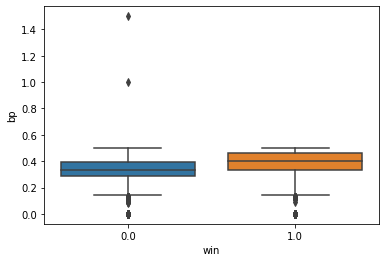

In [124]:
sns.boxplot(data=data, x='win', y='bp')

In [125]:
''' 
Used data set
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

'''


chisq_stats = stats.chi2_contingency(pd.crosstab(data['win'].astype(bool),
                                                 data['many_bp']),
                                                 correction=True)

In [126]:
chisq_stats[1]

0.0

In [129]:
s = np.sum(pd.crosstab(data['win'].astype(bool), data['many_bp']))
s = s.sum()

minshape = min(pd.crosstab(data['win'].astype(bool), data['many_bp']).shape) - 1

cramer_stat = np.sqrt((chisq_stats[0]/s)/minshape)
cramer_stat

0.17720670664270316